In [1]:
using Images
using ImageView
using FileIO
using Colors

INFO: Recompiling stale cache file /home/ramcha/.julia/lib/v0.5/ImageView.ji for module ImageView.


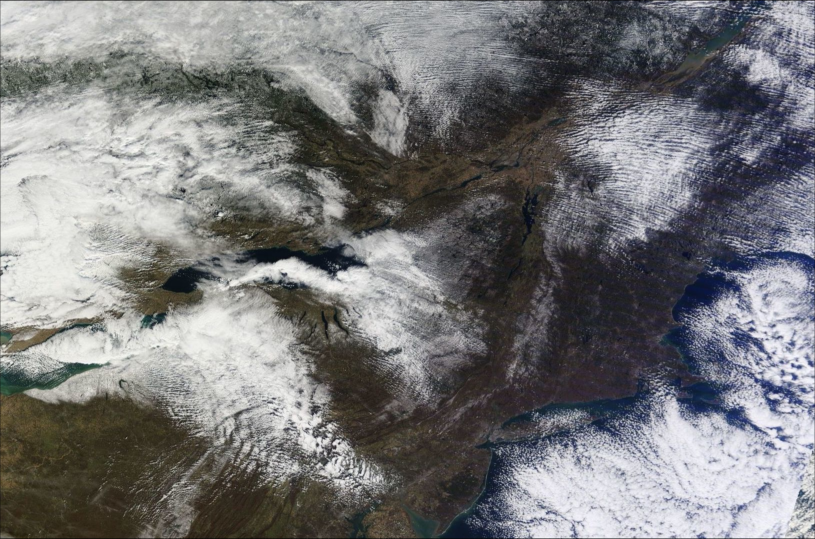

In [4]:
imgc = load("./2014/11.15.14.jpeg")

In [6]:
size(imgc)

(1076, 1629)

In [18]:
img_hsv = HSV.(imgc)
image_h = zeros(1076,1629)
for i in 1:1076
    for j in 1:1629
        image_h[i,j] = img_hsv[i,j].h
    end 
end 
dump(image_h[1])

Float64 150.0


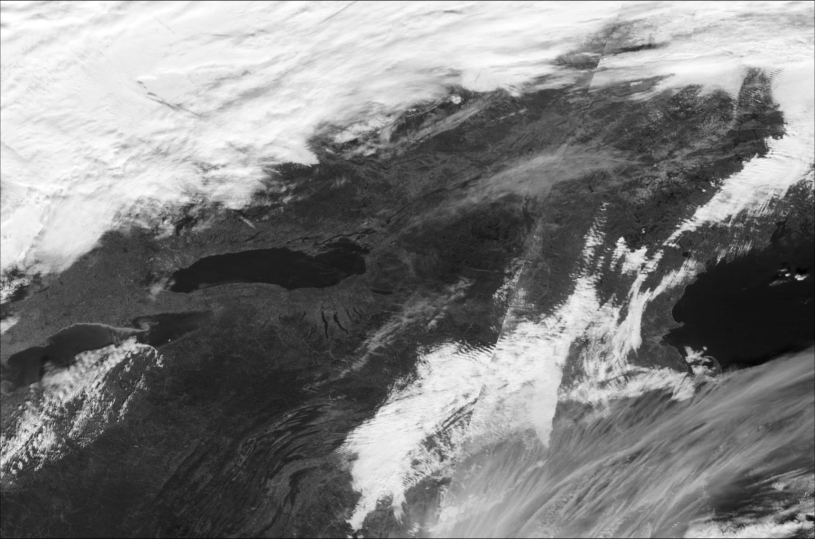

In [7]:
img_gray = Gray.(imgc)

In [14]:
kernel = [1 0 -1; 2 0 -2;1 0 -1];

In [19]:
#sobel_x = imfilter(img_gray, kernel);
#grad = imfilter(sobel_x, kernel')
sobel_x = imfilter(image_h, kernel);
grad = imfilter(sobel_x, kernel')

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in _kernelshift at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:1049 [inlined]
 in kernelshift at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:1046 [inlined]
 in factorstridedkernel(::Tuple{Base.OneTo{Int64},Base.OneTo{Int64}}, ::Array{Int64,2}) at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:1042
 in factorkernel(::Array{Int64,2}) at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:1024
 in imfilter at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:10 [inlined]
 in imfilter(::Array{Float64,2}, ::Array{Int64,2}) at /home/ramcha/.julia/v0.5/ImageFiltering/src/imfilter.jl:5
 in include_string(::String, ::String) at ./loading.jl:441
 in include_string(::Module, ::String, ::String) at /home/ramcha/.julia/v0.5/Compat/src/Compat.jl:478
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/ramcha/.julia/v0.5/IJulia/src/execute_request.jl:154
 in invokelatest(::Function, ::ZMQ.Socket, ::V

1076×1629 Array{Float64,2}:
   4.60343e-28    4.60343e-28  …     -4.54747e-13     -4.54747e-13
   4.60343e-28    4.60343e-28        -4.54747e-13     -4.54747e-13
   4.60343e-28    4.60343e-28         6.1379e-28       6.1379e-28 
   4.60343e-28    4.60343e-28         6.1379e-28       6.1379e-28 
   4.60343e-28    4.60343e-28         0.941177         4.54747e-13
   4.60343e-28    4.60343e-28  …      2.82353          4.54747e-13
   4.60343e-28    4.60343e-28         6.88235         -4.54747e-13
   4.60343e-28    4.60343e-28         8.11765         -4.54747e-13
   4.60343e-28    4.60343e-28        -2.82353          6.1379e-28 
   4.60343e-28    4.60343e-28        -8.48665          0.818176   
   4.60343e-28    4.60343e-28  …      1.40906          2.13635    
   4.60343e-28    4.60343e-28         6.16666          4.55554    
   4.60343e-28    4.60343e-28        10.8189          16.8157     
   ⋮                           ⋱                                  
   1.13687e-13    1.13687e-13     

In [20]:
grad .^ 4

1076×1629 Array{Float64,2}:
      4.49082e-110      4.49082e-110  …      4.27642e-50       4.27642e-50 
      4.49082e-110      4.49082e-110         4.27642e-50       4.27642e-50 
      4.49082e-110      4.49082e-110         1.41932e-109      1.41932e-109
      4.49082e-110      4.49082e-110         1.41932e-109      1.41932e-109
      4.49082e-110      4.49082e-110         0.784668          4.27642e-50 
      4.49082e-110      4.49082e-110  …     63.5581            4.27642e-50 
      4.49082e-110      4.49082e-110      2243.61              4.27642e-50 
      4.49082e-110      4.49082e-110      4342.3               4.27642e-50 
      4.49082e-110      4.49082e-110        63.5581            1.41932e-109
      4.49082e-110      4.49082e-110      5187.34              0.448113    
      4.49082e-110      4.49082e-110  …      3.94199          20.8301      
      4.49082e-110      4.49082e-110      1446.1             430.685       
      4.49082e-110      4.49082e-110     13700.3           7

In [229]:
size(grad)

(1076, 1629)

In [241]:
tmp = grad[31:40][1]

In [251]:
dump(grad[1,187])

ColorTypes.Gray{Float32}
  val: Float32 -0.007843137


In [23]:
bool_edges = fill(false,1076,1629)

1076×1629 Array{Bool,2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
     ⋮                    

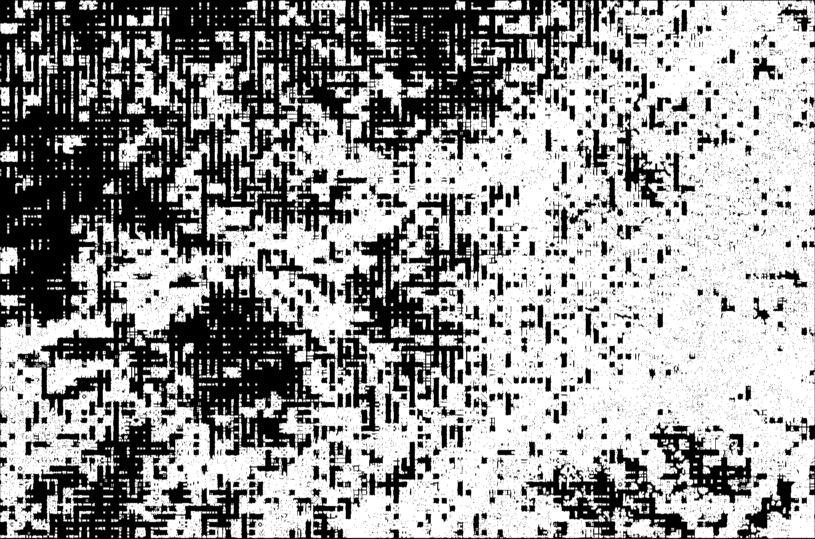

In [24]:
threshold = 0.6^4
g = grad.^4
for i in 1:1076
    for j in 1:1629
        if(g[i,j] > threshold)
            bool_edges[i,j] = true
        end
     end 
end 

a = Gray.(bool_edges)

In [ ]:
threshold = 0.6^4
g = grad.^4
for i in 1:1076
    for j in 1:1629
        if(g[i,j].val > threshold)
            bool_edges[i,j] = true
        end
     end 
end 

a = Gray.(bool_edges)

In [256]:
1076*1629

1752804

In [217]:
canny_edges = canny(img_gray,(Percentile(96.0), Percentile(4.0)),1.5)

1076×1629 Array{Bool,2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false      true   true   true   true   true
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
     ⋮                    

In [25]:
canny_edges = canny(image_h,(Percentile(96.0), Percentile(4.0)),1.5)

1076×1629 Array{Bool,2}:
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false  …  false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
 false  false  false  false  false     false  false  false  false  false
     ⋮                    

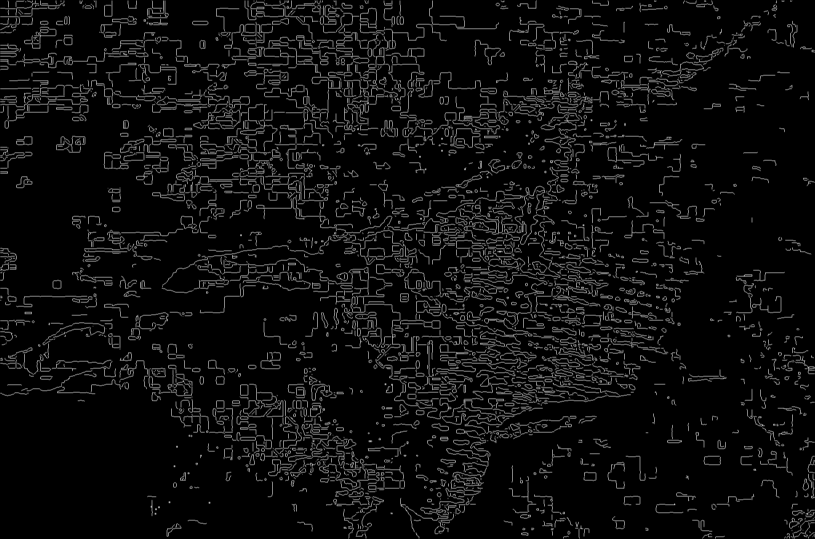

In [26]:
a = Gray.(canny_edges)

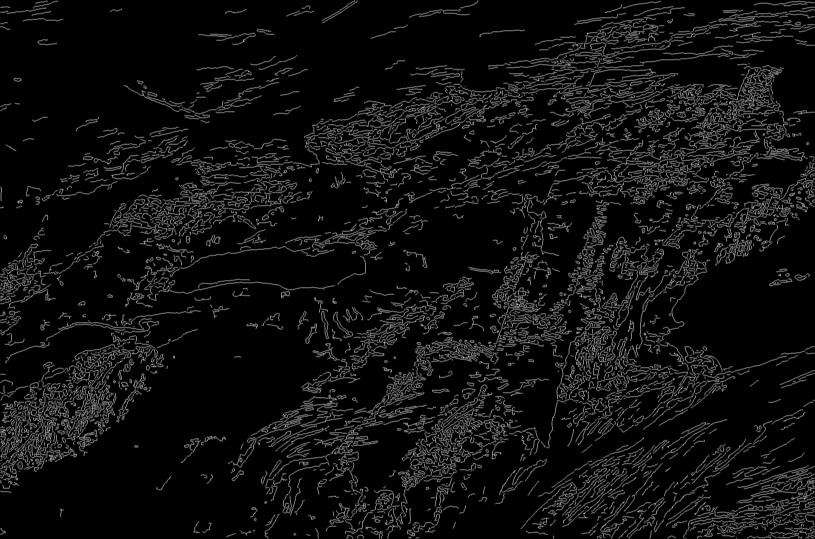

In [218]:
a = Gray.(canny_edges)

In [82]:
typeof(a)

Array{ColorTypes.Gray{Bool},2}

In [18]:
dump(a[1230])

ColorTypes.Gray{Bool}
  val: Bool true


In [31]:
deg2rad(90.0)
size(a)

(1076, 1629)

In [32]:
c = -90.0:90.0

-90.0:1.0:90.0

In [34]:
b = deg2rad(c)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] deg2rad(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at .\deprecated.jl:57
 [3] include_string(::String, ::String) at .\loading.jl:515
 [4] include_string(::Module, ::String, ::String) at C:\Users\rm949\.julia\v0.6\Compat\src\Compat.jl:478
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\rm949\.julia\v0.6\IJulia\src\execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at C:\Users\rm949\.julia\v0.6\IJulia\src\eventloop.jl:8
 [7] (::IJulia.##14#17)() at .\task.jl:335
while loading In[34], in expression starting on line 1


181-element Array{Float64,1}:
 -1.5708 
 -1.55334
 -1.53589
 -1.51844
 -1.50098
 -1.48353
 -1.46608
 -1.44862
 -1.43117
 -1.41372
 -1.39626
 -1.37881
 -1.36136
  ⋮      
  1.37881
  1.39626
  1.41372
  1.43117
  1.44862
  1.46608
  1.48353
  1.50098
  1.51844
  1.53589
  1.55334
  1.5708 

In [37]:
ceil(4.9)

5.0

In [39]:
b = fill(0,4,5)

4×5 Array{Int64,2}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

In [47]:
1076*1629

1752804

In [66]:
b = [true true false true; false true false false; true true true false ]

3×4 Array{Bool,2}:
  true  true  false   true
 false  true  false  false
  true  true   true  false

In [67]:
nnz = find(b')

7-element Array{Int64,1}:
  1
  2
  4
  6
  9
 10
 11

In [96]:
round(Int,1244.0)

1244

In [101]:
m,n = size(canny_edges)

(1076, 1629)

In [104]:
ceil(3.9)

4.0

In [103]:
thetas = deg2rad.(-90.0:90.0)
diag_len = ceil(sqrt(m*m + n*n))   # max_dist
rhos = linspace(-diag_len, diag_len, diag_len * 2.0)
rhos[1:10]

-1953.0:1.0002560819462227:-1943.997695262484

In [107]:
diag_len

1953.0

In [202]:
4^2

16

In [30]:
function hough_line(img)
  # Rho and Theta ranges
    thetas = deg2rad.(-90.0:90.0)
    height,width = size(img)
    diag_len = Int(ceil(sqrt((height-1)^2 + (width-1)^2)))   # max_dist
    rhos = linspace(-diag_len, diag_len, diag_len * 2.0)
    m = height 
    n = width
    # Cache some resuable values
    cos_t = cos.(thetas)
    sin_t = sin.(thetas)
    num_thetas = length(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = fill(0,2 * diag_len, num_thetas)
    
    nonzeros = find(img')
        
    #y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in 1:length(nonzeros)
        y = Int(ceil(nonzeros[i]/n))
        t = nonzeros[i]%n
        x = (t == 0? (n):(t))
        
        for t_idx in 1:num_thetas
          # Calculate rho. diag_len is added for a positive index
            rho = Int(round((x-1) * cos_t[t_idx] + (y-1) * sin_t[t_idx])) + diag_len
            accumulator[rho, t_idx] += 1
        end 
    end 
    
    return accumulator, thetas, rhos
end 

hough_line (generic function with 1 method)

In [34]:
acc,thetas,rhos = hough_line(bool_edges)

(
[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0],

[-1.5708,-1.55334,-1.53589,-1.51844,-1.50098,-1.48353,-1.46608,-1.44862,-1.43117,-1.41372  …  1.41372,1.43117,1.44862,1.46608,1.48353,1.50098,1.51844,1.53589,1.55334,1.5708],linspace(-1951.0,1951.0,3902))

In [266]:
size(acc)

(3902, 181)

In [267]:
findmax(acc)

(620, 530009)

In [268]:
ind2sub(acc,findmax(acc)[2])

(3239, 136)

In [270]:
new_acc = acc
new_acc[3239,136] = 0;

In [272]:
findmax(new_acc)

(610, 634945)

In [271]:
ind2sub(new_acc,findmax(new_acc)[2])

(2821, 163)

In [182]:
nacc = acc[2500:3906,:]
findmax(nacc)

(210, 190508)

In [183]:
ind2sub(nacc,190508)

(563, 136)

In [184]:
563+2500

3063

In [117]:
ind2sub(acc,432150)

(2490, 111)

In [121]:
acc[2490,111]

237

In [124]:
rho + diag_len

2489.6373879641487

In [35]:
rho_idx = 3063
theta_idx = 136
theta = thetas[theta_idx]
rho = rhos[rho_idx]

1111.7849269418098

In [36]:
mval,midx = findmax(acc)
rho_idx,theta_idx = ind2sub(acc,midx)
theta = thetas[theta_idx]
rho = rhos[rho_idx]
dump(rad2deg(theta))
dump(rho)

Float64 45.0
Float64 1159.797231479108


In [176]:
rho_idx

2490

In [37]:
angle = rad2deg(theta)
#angle = theta
slope = -cos.(angle)/sin.(angle)

-0.6173696237835551

In [38]:
intercept = (rho)/sin.(angle)

1363.018483339945

In [48]:
img_hsv = HSV.(imgc)
img1 = copy(img_hsv);
img2 = copy(img_hsv);

In [40]:
for i in 1:1076
    for j in 1:1629
        # y > mx + b => image 1 , else image 2
        if(i > slope*j + intercept)
            img2[i,j] = HSV{Float64}(img2[i,j].h,img2[i,j].s,0.0)
        else
            img1[i,j] = HSV{Float64}(img1[i,j].h,img1[i,j].s,0.0)
        end 
     end
end

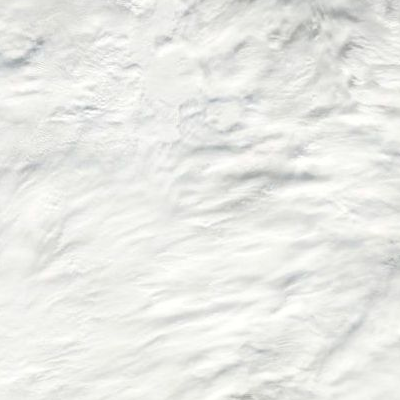

In [8]:
im_cloud = imgc[100:499,100:499]

In [10]:
im_cloud[150,150]

In [11]:
dump(im_cloud[150,150])

ColorTypes.RGB{FixedPointNumbers.Normed{UInt8,8}}
  r: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 226
  g: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 226
  b: FixedPointNumbers.Normed{UInt8,8}
    i: UInt8 224


In [ ]:
# features - red, blue, green. 
# labels - "cloud" , "not cloud"

# first dimension - features. 
# second dimension - training points 400x400 cloud, 600x600 not cloud. totally 16e4 + 36e4

imsub1 = convert(Array{RGB{Float64}},im_cloud)
label = Array{String}(520000)
train = zeros(3,52e4)
for i in 1:400
    for j in 1:400
        k = 400*(i-1)+j
        train[1,k] = imsub1[i,j].r
        train[2,k] = imsub1[i,j].g
        train[3,k] = imsub1[i,j].b
        label[k] = "cloud"
    end
end 

In [ ]:
dump(imsub1[120,120])

In [ ]:
i = 120
j = 120
k = 400*119 + 120

In [ ]:
train[:,k]

In [ ]:
label[k]

In [ ]:
imgg = load("./2014/9.27.14.jpeg")

In [ ]:
im_green = imgg[400:999,200:799]

In [ ]:
# features - red, blue, green. 
# labels - "cloud" , "not cloud"

# first dimension - features. 
# second dimension - training points 400x400 cloud, 600x600 not cloud. totally 16e4 + 36e4
k0 = 400*399 + 400
imsub2 = convert(Array{RGB{Float64}},im_green)
for i in 1:600
    for j in 1:600
        k = 600*(i-1)+j + k0
        train[1,k] = imsub2[i,j].r
        train[2,k] = imsub2[i,j].g
        train[3,k] = imsub2[i,j].b
        label[k] = "not cloud"
    end
end 

In [ ]:
train[:,k0]

In [ ]:
label[k0]

In [ ]:
train[:,k0+1]

In [ ]:
label[k0+1]

In [ ]:
p = randperm(520000)

instances = train[:,p]
plabel = label[p]

train_instances = instances[:,1:39999]
train_labels = plabel[1:39999]

test_instances = instances[:,40000:end]
test_labels = plabel[40000:end]

model = svmtrain(train_instances,train_labels);

(predicted_labels, decision_values) = svmpredict(model, test_instances);

# Compute accuracy
@printf "Accuracy: %.2f%%\n" mean((predicted_labels .== test_labels))*100

In [ ]:
timg = load("./2015/10.27.15.jpeg")

In [ ]:
tpix = timg[550:550,860:860]

In [ ]:
tarr = convert(Array{RGB{Float64}},tpix)

In [ ]:
test = reshape([tarr[1,1].r;tarr[1,1].g;tarr[1,1].b],3,1)

In [ ]:
typeof(test_instances)

In [ ]:
(pred, val) = svmpredict(model, test);



In [ ]:
pred

In [ ]:
typeof(model)

In [ ]:
dump(model)

In [ ]:
using JLD
save("svm-cloud.jld","data",model)